<a href="https://colab.research.google.com/github/uhyozzy/multi_semiproject/blob/main/step1_%ED%91%9C%EC%A4%80%ED%99%94%ED%9B%84_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84(heatmap).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import unicodedata

## **파일 준비**

In [2]:
import chardet
with open("/content/침수관련_데이터_표준화.csv", mode='rb') as f:
  d = f.readline()
print(chardet.detect(d))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


**파일읽기**

In [3]:
df = pd.read_csv("/content/침수관련_데이터_표준화.csv",encoding='utf-8')
df

# 주피터 노트북에 파일 없으면 오류뜸, 노트북 자체에 파일 옮기고 pd.read 실시

,자치구(구),날짜,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),침수 피해(0/1)
0,종로,20180601,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-1.300546,-0.339496,0
1,종로,20180602,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-1.304192,-0.339496,0
2,종로,20180603,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-1.315528,-0.339496,0
3,종로,20180604,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-1.306164,-0.339496,0
4,종로,20180605,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-1.306034,-0.339496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,강동,20220827,1.684897,0.406290,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.298097,0.034392,0
11496,강동,20220828,-0.418190,-0.357548,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.418113,-0.279674,0
11497,강동,20220829,-0.358102,-0.292076,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.354807,-0.275187,0
11498,강동,20220830,0.182692,1.541134,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,0.053846,-0.225834,0


**각 컬럼별 결측치 확인**

In [4]:
df.isnull()
df.isnull().sum()

자치구(구)                0
날짜                    0
1hr 최대 강수량(mm)        0
일평균 강수량(mm)           0
경사도(˚)                0
해발고도(m)               0
불투수면(%)               0
녹지 면적율(%)             0
하천 면적율(%)             0
복개하천 개수(개)            0
맨홀 개수(개)              0
빗물받이 개수(개)            0
빗물 펌프 개수(개)           0
[AVG] 하수관로 비율(%)    213
[MAX] 하수관로 비율(%)    213
침수 피해(0/1)            0
dtype: int64

**데이터프레임의 누락데이터 제거**

In [5]:
#누락데이터가 하나라도 포함된 행은 삭제
df.dropna(how='any', axis=0, inplace=True)
# df의 결측치 제거확인
df.isnull().sum()

자치구(구)              0
날짜                  0
1hr 최대 강수량(mm)      0
일평균 강수량(mm)         0
경사도(˚)              0
해발고도(m)             0
불투수면(%)             0
녹지 면적율(%)           0
하천 면적율(%)           0
복개하천 개수(개)          0
맨홀 개수(개)            0
빗물받이 개수(개)          0
빗물 펌프 개수(개)         0
[AVG] 하수관로 비율(%)    0
[MAX] 하수관로 비율(%)    0
침수 피해(0/1)          0
dtype: int64

# **데이터 프레임 나누기**
- 자치구와 날짜
  - pd_df = place, date
- features data
  - pf_df = precipitation features 강수특징
  - tf_df = topographic features 지형특징
  - ef_df = environment feature 자연환경특징
- label data
  - ld_df = label data : 하수관로 비율(%)

In [6]:
pd_df = df[['자치구(구)','날짜']]
pd_df

,자치구(구),날짜
0,종로,20180601
1,종로,20180602
2,종로,20180603
3,종로,20180604
4,종로,20180605
...,...,...
11495,강동,20220827
11496,강동,20220828
11497,강동,20220829
11498,강동,20220830


In [7]:
pf_df = df[['1hr 최대 강수량(mm)','일평균 강수량(mm)']]
pf_df

,1hr 최대 강수량(mm),일평균 강수량(mm)
0,-0.418190,-0.357548
1,-0.418190,-0.357548
2,-0.418190,-0.357548
3,-0.418190,-0.357548
4,-0.418190,-0.357548
...,...,...
11495,1.684897,0.406290
11496,-0.418190,-0.357548
11497,-0.358102,-0.292076
11498,0.182692,1.541134


In [8]:
tf_df = df[['경사도(˚)','해발고도(m)']]
tf_df

,경사도(˚),해발고도(m)
0,1.457172,1.780471
1,1.457172,1.780471
2,1.457172,1.780471
3,1.457172,1.780471
4,1.457172,1.780471
...,...,...
11495,-1.144851,-0.775772
11496,-1.144851,-0.775772
11497,-1.144851,-0.775772
11498,-1.144851,-0.775772


In [9]:
ef_df = df[['불투수면(%)','녹지 면적율(%)','하천 면적율(%)','복개하천 개수(개)',
            '맨홀 개수(개)','빗물받이 개수(개)','빗물 펌프 개수(개)']]
ef_df

,불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개)
0,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320
1,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320
2,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320
3,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320
4,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320
...,...,...,...,...,...,...,...
11495,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157
11496,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157
11497,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157
11498,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157


In [10]:
ld_df = df[['[MAX] 하수관로 비율(%)']]
ld_df

,[MAX] 하수관로 비율(%)
0,-0.339496
1,-0.339496
2,-0.339496
3,-0.339496
4,-0.339496
...,...
11495,0.034392
11496,-0.279674
11497,-0.275187
11498,-0.225834


In [11]:
fd_df = df[['침수 피해(0/1)']]
fd_df

,침수 피해(0/1)
0,0
1,0
2,0
3,0
4,0
...,...
11495,0
11496,0
11497,0
11498,0


**상관분석용 데이터 만들기**
- cd :  correlation dataframe
- cd1 : 강수특징(pf_df)과 하수관로비율 레이블(ld_df) 합친 df
- cd2 : 지형특징(tf_df)과 하수관로비율 레이블(ld_df) 합친 df
- cd3 : 자연환경특징(ef_df)과 하수관로비율 레이블(ld_df) 합친 df
- cd4 : pf_df, tf_df, ef_df와 하수곤로비율 레이블의 상관관계

In [12]:
cd1 = pf_df.join(ld_df)
cd1

,1hr 최대 강수량(mm),일평균 강수량(mm),[MAX] 하수관로 비율(%)
0,-0.418190,-0.357548,-0.339496
1,-0.418190,-0.357548,-0.339496
2,-0.418190,-0.357548,-0.339496
3,-0.418190,-0.357548,-0.339496
4,-0.418190,-0.357548,-0.339496
...,...,...,...
11495,1.684897,0.406290,0.034392
11496,-0.418190,-0.357548,-0.279674
11497,-0.358102,-0.292076,-0.275187
11498,0.182692,1.541134,-0.225834


In [13]:
cd2 = tf_df.join(ld_df)
cd2

,경사도(˚),해발고도(m),[MAX] 하수관로 비율(%)
0,1.457172,1.780471,-0.339496
1,1.457172,1.780471,-0.339496
2,1.457172,1.780471,-0.339496
3,1.457172,1.780471,-0.339496
4,1.457172,1.780471,-0.339496
...,...,...,...
11495,-1.144851,-0.775772,0.034392
11496,-1.144851,-0.775772,-0.279674
11497,-1.144851,-0.775772,-0.275187
11498,-1.144851,-0.775772,-0.225834


In [14]:
cd3 = ef_df.join(ld_df)
cd3

,불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),[MAX] 하수관로 비율(%)
0,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496
1,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496
2,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496
3,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496
4,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496
...,...,...,...,...,...,...,...,...
11495,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,0.034392
11496,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.279674
11497,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.275187
11498,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.225834


In [15]:
cd4 = df.drop(['자치구(구)','날짜','[AVG] 하수관로 비율(%)'], axis=1)
cd4

,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),[MAX] 하수관로 비율(%),침수 피해(0/1)
0,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496,0
1,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496,0
2,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496,0
3,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496,0
4,-0.418190,-0.357548,1.457172,1.780471,-0.897378,-0.911544,-0.842953,-0.285351,-0.566331,-0.808862,-0.632320,-0.339496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,1.684897,0.406290,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,0.034392,0
11496,-0.418190,-0.357548,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.279674,0
11497,-0.358102,-0.292076,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.275187,0
11498,0.182692,1.541134,-1.144851,-0.775772,-0.447061,0.845423,0.579303,-1.177071,-0.360440,0.412776,0.934157,-0.225834,0


## **상관관계 파악하기**

In [16]:
cd1.corr()

,1hr 최대 강수량(mm),일평균 강수량(mm),[MAX] 하수관로 비율(%)
1hr 최대 강수량(mm),1.000000,0.865369,0.114450
일평균 강수량(mm),0.865369,1.000000,0.099629
[MAX] 하수관로 비율(%),0.114450,0.099629,1.000000


In [17]:
cd2.corr()

,경사도(˚),해발고도(m),[MAX] 하수관로 비율(%)
경사도(˚),1.000000,0.909621,-0.036760
해발고도(m),0.909621,1.000000,-0.073741
[MAX] 하수관로 비율(%),-0.036760,-0.073741,1.000000


In [18]:
cd3.corr()

,불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),[MAX] 하수관로 비율(%)
불투수면(%),1.000000,0.259446,0.147487,-0.223985,-0.214044,-0.140007,0.172530,0.007990
녹지 면적율(%),0.259446,1.000000,0.416898,-0.340594,0.310723,0.302235,0.330721,0.042440
하천 면적율(%),0.147487,0.416898,1.000000,-0.307321,0.167382,0.117901,0.301695,0.045254
복개하천 개수(개),-0.223985,-0.340594,-0.307321,1.000000,0.121882,0.023857,-0.149484,-0.053191
맨홀 개수(개),-0.214044,0.310723,0.167382,0.121882,1.000000,0.637541,0.157582,0.065488
빗물받이 개수(개),-0.140007,0.302235,0.117901,0.023857,0.637541,1.000000,0.237757,0.053617
빗물 펌프 개수(개),0.172530,0.330721,0.301695,-0.149484,0.157582,0.237757,1.000000,0.109950
[MAX] 하수관로 비율(%),0.007990,0.042440,0.045254,-0.053191,0.065488,0.053617,0.109950,1.000000


## **heatmap 시각화**

In [19]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [20]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

In [21]:
plt.figure(figsize=(12, 9))
plt.show()

<Figure size 1200x900 with 0 Axes>

In [22]:
import warnings
warnings.filterwarnings("ignore")

**강수특징과 하수관로비율과의 관계**

Text(0.5, 1.0, '강수특징과 하수관로비율과의 관계')

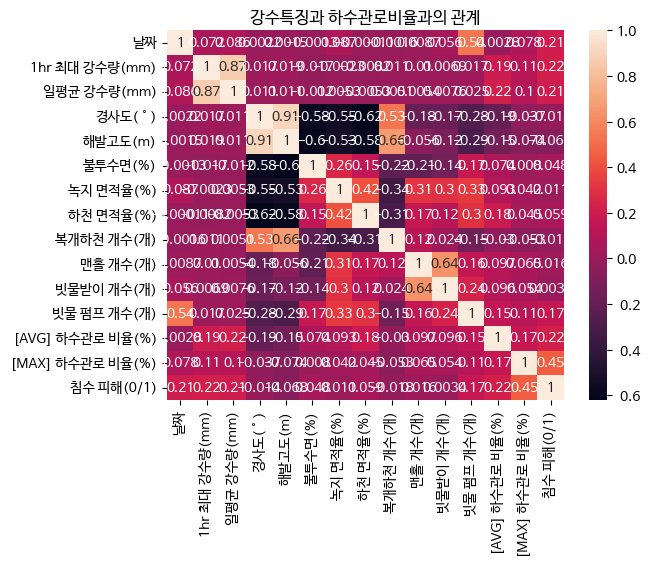

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.title('강수특징과 하수관로비율과의 관계')

**지형특징과 하수관로비율과의 관계**

Text(0.5, 1.0, '지형특징과 하수관로비율과의 관계')

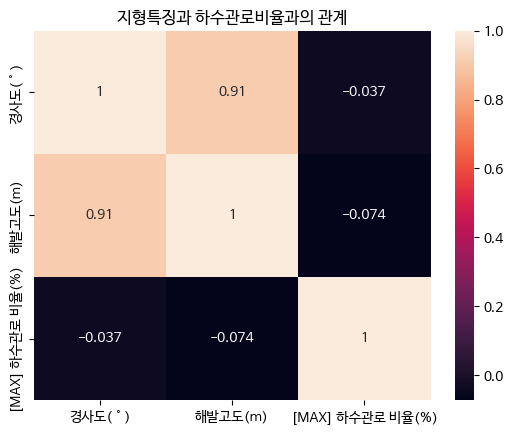

In [24]:
sns.heatmap(cd2.corr(), annot=True)
plt.title('지형특징과 하수관로비율과의 관계')

**자연환경특징과 하수관로비율과의 관계**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '불투수면(%)'),
  Text(1.5, 0, '녹지 면적율(%)'),
  Text(2.5, 0, '하천 면적율(%)'),
  Text(3.5, 0, '복개하천 개수(개)'),
  Text(4.5, 0, '맨홀 개수(개)'),
  Text(5.5, 0, '빗물받이 개수(개)'),
  Text(6.5, 0, '빗물 펌프 개수(개)'),
  Text(7.5, 0, '[MAX] 하수관로 비율(%)')])

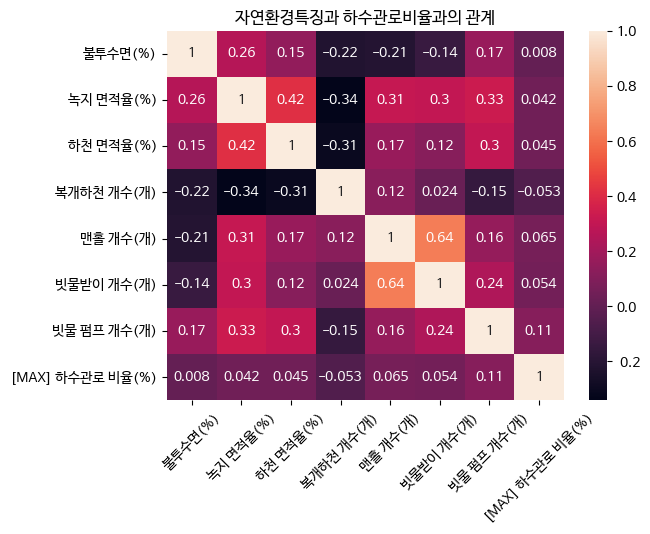

In [25]:
sns.heatmap(cd3.corr(), annot=True)
plt.title('자연환경특징과 하수관로비율과의 관계')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, '1hr 최대 강수량(mm)'),
  Text(1.5, 0, '일평균 강수량(mm)'),
  Text(2.5, 0, '경사도(˚)'),
  Text(3.5, 0, '해발고도(m)'),
  Text(4.5, 0, '불투수면(%)'),
  Text(5.5, 0, '녹지 면적율(%)'),
  Text(6.5, 0, '하천 면적율(%)'),
  Text(7.5, 0, '복개하천 개수(개)'),
  Text(8.5, 0, '맨홀 개수(개)'),
  Text(9.5, 0, '빗물받이 개수(개)'),
  Text(10.5, 0, '빗물 펌프 개수(개)'),
  Text(11.5, 0, '[MAX] 하수관로 비율(%)'),
  Text(12.5, 0, '침수 피해(0/1)')])

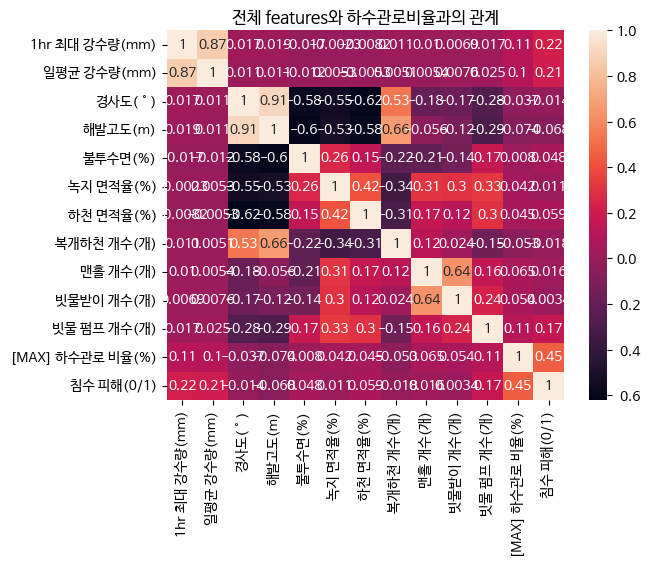

In [26]:
sns.heatmap(cd4.corr(),annot=True)
plt.title('전체 features와 하수관로비율과의 관계')
plt.xticks(rotation=90)